In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim

In [ ]:
env = gym.make('CartPole-v0')

In [11]:
class Agent:
    def __init__(self, n_states, n_hidden, n_actions, lr=0.003):
        self.net = nn.Sequential(nn.Linear(n_states, n_hidden),
                                 nn.ReLU(),
                                 nn.Linear(n_hidden, n_actions),
                                 nn.Softmax(dim=0))
        self.opt = optim.Adam(self.net.parameters(), lr=lr)
        
    def predict(self, observation):
        state = torch.tensor(observation, dtype=torch.float32)
        actions = agent.net(state)
        
        return actions
    
    def update(self, loss):
        self.opt.zero_grad()
        loss.backward()
        self.opt.step()

In [4]:
def discount_rewards(rewards, gamma=0.99):
    discounted = []
    R = 0
    for r in rewards[::-1]:
        R = r + gamma * R
        discounted.insert(0, R)
    return discounted

In [19]:
agent = Agent(4, 128, 2, lr=0.003)
total_episodes = 1000
max_steps = 999

ii = 0
print_every = 100
render = True
reward_log = []

while ii < total_episodes:
    state = env.reset()
    rewards, actions = [], []
    for t in range(max_steps):
        # Have our agent predict an action from the state
        action_ps = agent.predict(state)
        action = torch.multinomial(action_ps, 1).item()
        actions.append(action_ps[action].unsqueeze(0))
        
        # Get the next state and the reward
        state, reward, done, _ = env.step(action)
        rewards.append(reward)
        
        if render and ii % print_every == 0:
            env.render()
            
        if done:
            reward_log.append(sum(rewards))
            if ii % print_every == 0:
                print(sum(rewards))
            
            losses = []
            rewards = discount_rewards(rewards)
            for a, r in zip(actions, rewards):
                losses.append(-torch.log(a)*r)
            loss = torch.cat(losses).sum()
            
            agent.update(loss)
            break
            
    state = env.reset()
    ii += 1

17.0
127.0
41.0
138.0
169.0
200.0
200.0
200.0
200.0
200.0


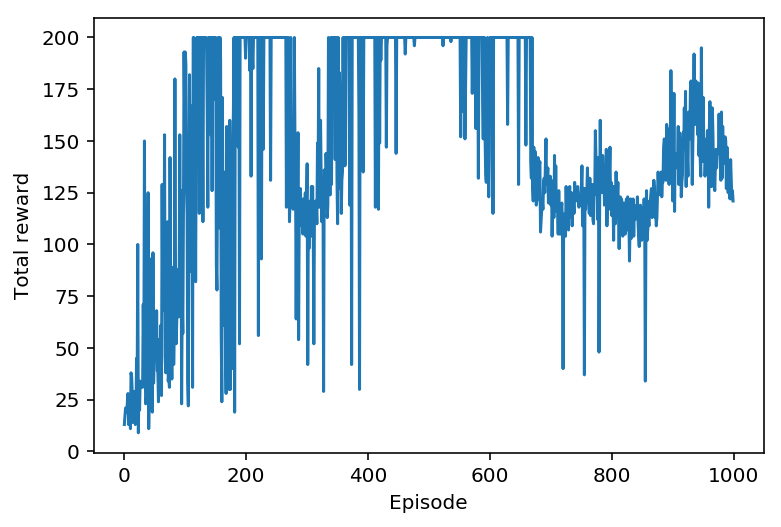

In [18]:
plt.plot(reward_log)
plt.xlabel('Episode')
plt.ylabel('Total reward');